In [1]:
import pandas as pd
import pickle
import seaborn as sns

# Necessary imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from statsmodels.multivariate.pca import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [17]:
new_era = pickle.load(open('ready_for_model_new_era.p','rb'))
new_era['new_era'] = 1
new_era['old_era'] = 0

In [18]:
new_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year,new_era,old_era
63,108.0,105.0,102.0,102.0,91.0,113,112,111,107,107,0.243902,2017,1,0
80,129.0,125.0,119.0,111.0,111.0,108,105,105,101,99,0.817073,2017,1,0
115,121.0,114.0,109.0,109.0,99.0,103,102,99,99,96,0.817073,2016,1,0
136,117.0,114.0,112.0,108.0,106.0,105,105,104,103,102,0.621951,2015,1,0
146,133.0,113.0,113.0,112.0,100.0,108,108,107,107,103,0.609756,2015,1,0


In [19]:
old_era = pickle.load(open('ready_for_model_old_era.p','rb'))
old_era['old_era'] = 1
old_era['new_era'] = 0

In [20]:
old_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year,old_era,new_era
91,126.0,119.0,119.0,118.0,111.0,110,110,108,106,104,0.695122,1995,1,0
65,141.0,125.0,124.0,116.0,109.0,106,104,101,100,98,0.878049,1996,1,0
111,114.0,111.0,110.0,106.0,104.0,110,109,106,106,104,0.475610,1995,1,0
136,120.0,116.0,113.0,113.0,109.0,109,109,107,103,101,0.682927,1994,1,0
57,111.0,110.0,108.0,105.0,105.0,108,106,106,102,101,0.536585,1997,1,0


In [21]:
combined_data = pd.concat([new_era,old_era])

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,new_era,old_era,win_per,year
0,108,108,107,105,105,120.0,119.0,119.0,115.0,113.0,1,0,0.707317,2019
1,109,108,107,107,107,122.0,118.0,113.0,110.0,107.0,1,0,0.597561,2019
2,116,116,116,115,111,111.0,106.0,105.0,102.0,94.0,1,0,0.209877,2019
3,113,113,111,110,106,124.0,119.0,114.0,110.0,106.0,1,0,0.506173,2019
4,115,110,109,108,104,120.0,118.0,114.0,114.0,109.0,1,0,0.617284,2019


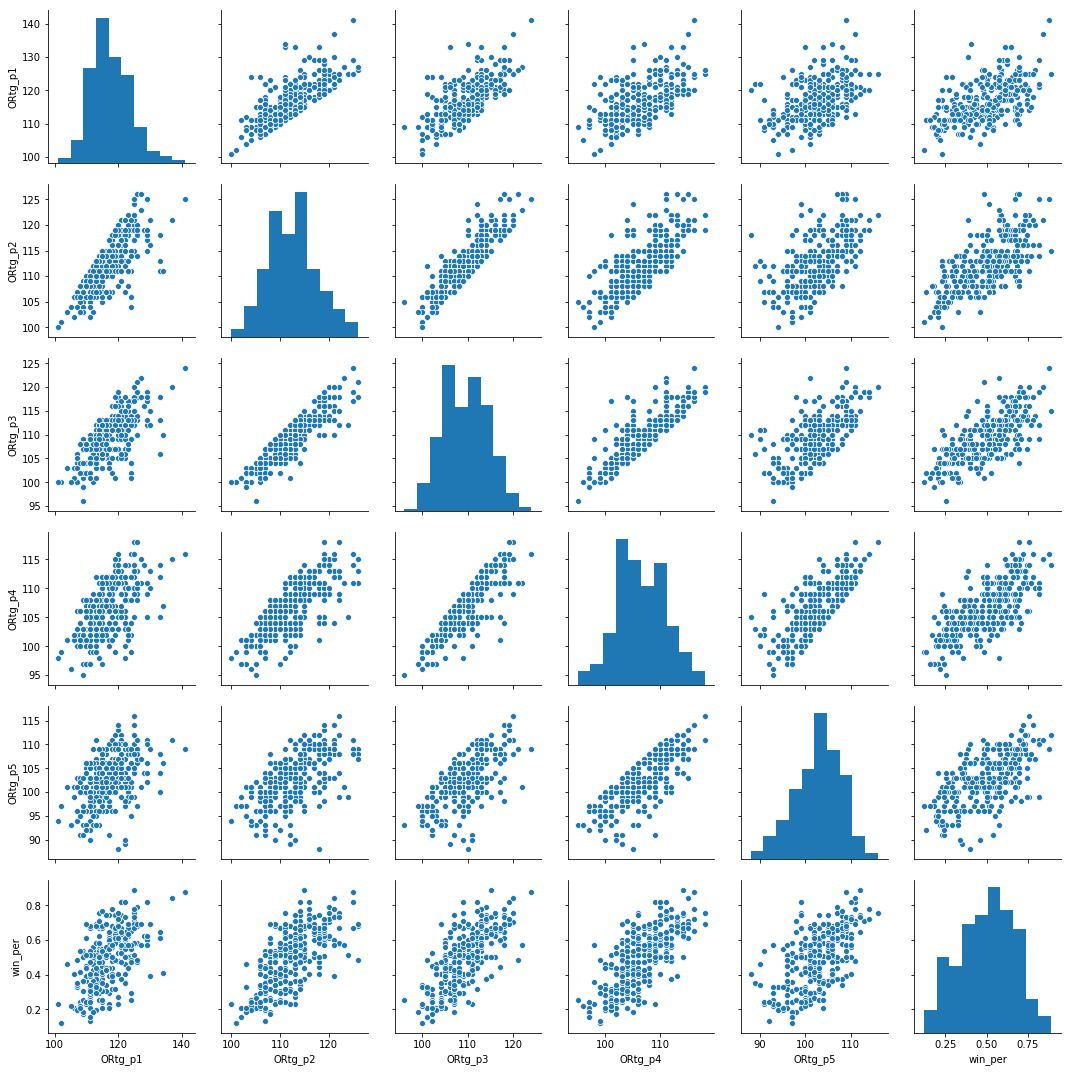

In [24]:
sns.pairplot(combined_data.loc[:,['ORtg_p1', 'ORtg_p2','ORtg_p3','ORtg_p4','ORtg_p5','win_per']]);

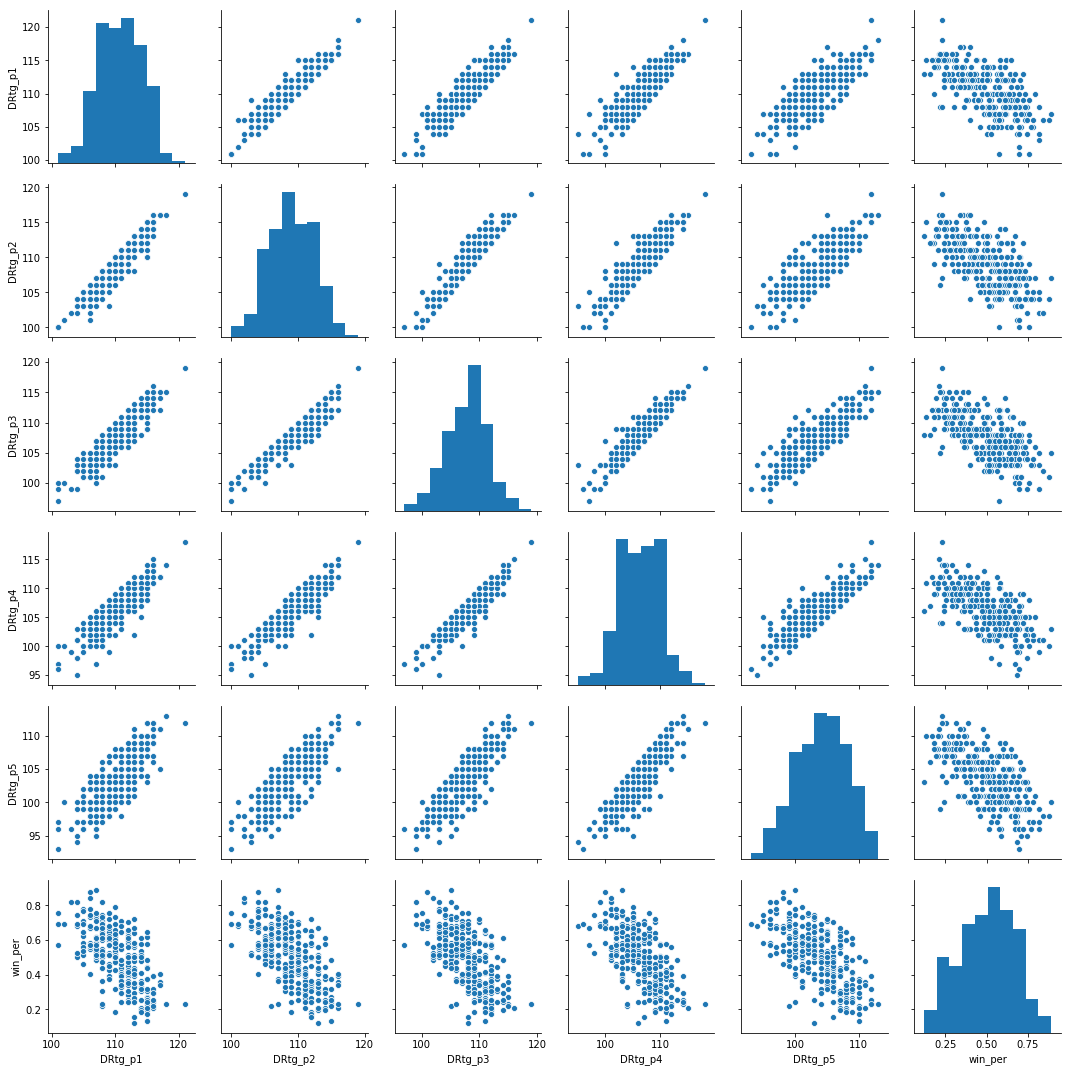

In [25]:
sns.pairplot(combined_data.loc[:,['DRtg_p1', 'DRtg_p2','DRtg_p3','DRtg_p4','DRtg_p5','win_per']]);

In [27]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('win_per ~ ORtg_p1 + ORtg_p2+ ORtg_p3+ ORtg_p4+ ORtg_p5 + DRtg_p1 + DRtg_p2+ DRtg_p3+ DRtg_p4+ DRtg_p5 + new_era + old_era', data=combined_data, return_type="dataframe")



# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                win_per   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     162.3
Date:                Thu, 11 Apr 2019   Prob (F-statistic):          2.67e-114
Time:                        15:46:34   Log-Likelihood:                 405.68
No. Observations:                 291   AIC:                            -787.4
Df Residuals:                     279   BIC:                            -743.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5449      0.108      5.057      0.000       0.333       0.757
ORtg_p1        0.0029      0.001      3.257      0.001       0.001       0.005
ORtg_p2        0.0057      0.002      3.328      0.001       0.002       0.009
ORtg_p3        0.0040      0.002      1.990      0.048    4.38e-05       0.008
ORtg_p4        0.0073      0.002      4.120      0.000       0.004       0.011
ORtg_p5        0.0039      0.001      3.565      0.000       0.002       0.006
DRtg_p1       -0.0067      0.003     -2.047      0.042      -0.013      -0.000
DRtg_p2       -0.0106      0.004     -2.591      0.010      -0.019      -0.003
DRtg_p3        0.0014      0.004      0.367      0.714      -0.006       0.009
DRtg_p4       -0.0058      0.003     -1.892      0.060      -0.012       0.000
DRtg_p5       -0.0053      0.002     -2.768      0.006      -0.009      -0.002
new_era        0.2850      0.055      5.222      0.000       0.178       0.392
old_era        0.2599      0.053      4.864      0.000       0.155       0.365
==============================================================================
Omnibus:                        0.697   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.802
Skew:                           0.106   Prob(JB):                        0.670
Kurtosis:                       2.854   Cond. No.                     1.37e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.82e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

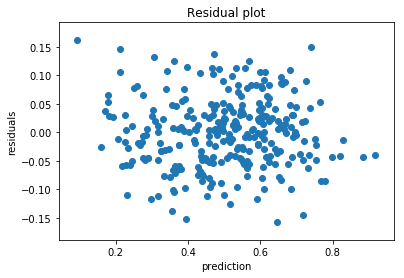

In [28]:
pred = fit.predict(X)
res = y.iloc[:,0] - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");
    


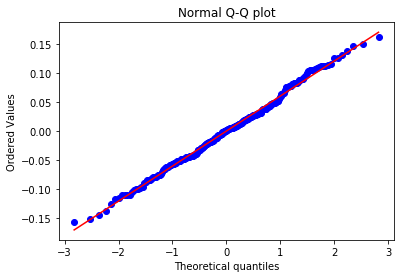

In [29]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

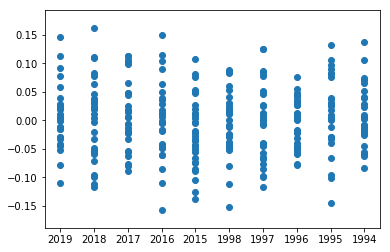

In [32]:
plt.scatter(y=res,x=combined_data['year'])

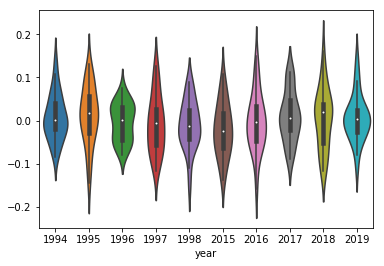

In [33]:
sns.violinplot(y=res,x=combined_data['year'])